**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho

Grupo número ( A  )

---


Aluna(o): Alison Pereira Ribeiro

---

Aluna(a): Leidiane Beatriz Passos Rodrigues

---

Aluna(o):  Thiago de Andrade Corrêa

---

#Especificação do problema : Árvores de Decisão

A partir da base de dados disponibilizada anteriormente, induzir uma árvore de decisão que correlacione o desempenho nos dois primeiros períodos do curso com um bom desempenho final e permita fazer previsões sobre o desempenho final de novos alunos.

Para isso, considere:


1.  Um aluno com bom desempenho é aquele que se forma em até 4 anos ou se forma com média igual ou superior a 7 ou  se forma com número de reprovações igual inferior a 5.

2. Para o treinamento do modelo, considere apenas as disciplinas dos dois primeiros períodos do curso.

3. Escolher pelo menos um dos seguintes algoritmos para a implementação: ID3, C4.5 e CART.

4. Para visualização das árvores de decisão geradas, utilize o [graphviz](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084).


**Observação 1**: Poderão ser utilizados códigos de outros autores, desde que sejam feitos ou devidos créditos aos mesmos. Esses códigos devem ser devidamente comentados.

**Observação 2**: O trabalho deve ser feito em grupo, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho e o trabalho de cada membro deverá ser devidamente identificado (por meio de** ##NomeDoAluno**)


#Planejamento de atividades

O grupo deverá listar aqui as atividades a serem desenvolvidas e os responsáveis por elas

- Limpar a base de dados
- Decidir o melhor algoritmo para se implementar
- Criar um modelo
- Dividir em conjunto de treinamento e conjunto de teste 
- Aplicar os treinamento
- Aplicar o teste

#Mural de trabalho

Neste campo, o grupo deverá registrar todas as interações realizadas. Cada anotação deve ser devidamente identificada por **##NomeDoAluno**).

- Confeccionar no relatório final as atividades desenvolvidas aqui. (**#Leidiane**)
- Algoritmo escolhido ID3 (**##Alison, ##Leidiane e ##Thiago**)
- Limpeza das tabelas (**##Alison, ##Leidiane e ##Thiago**)
- Excluir as colunas que não possuem relevância: nota_enem_linguagens.... (**##Leidiane, ##Thiago e ##Alison**)
- Fazer uma limpeza mais detalhada/refinada (excluindo todos os alunos que possuem o valor  diferente de **'GRADUADO'** na coluna situacao_discente) da tabelas (**##Leidiane, ##Thiago e ##Alison**)
- Excluir todas as colunas e linhas que possuem valor **NaN**. (**##Leidiane, ##Thiago e ##Alison**)
- Verificar valores **NaN** individualmente e excluir (linhas que não são Nan por completas). (**##Leidiane, ##Thiago e ##Alison**)
- Criar uma nova coluna chamada "target" que representa se o aluno formou em 4 anos ou não. (**#Alison, #Leidiane e #Thiago**)
- Binarizar a coluna target em "SIM" ou "NÃO". (**#Alison, #Leidiane e #Thiago**)
- Escolher uma forma de representar os dados. (**##Leidiane, ##Thiago e ##Alison**)
- Criar um modelo (representação dos dados) (**##Leidiane, ##Thiago e ##Alison**)
- Normalizar todos os dados. (**##Leidiane, ##Thiago e ##Alison**)
- Rodar o algoritmo de árvore de decisão. (**#Alison**)

# Descrição do modelo

O grupo deverá descrever o modelo a ser implementado e o conjunto de treino.

O modelo passou por um processo de pré-processamento dos dados, no qual colunas que não entraram no escopo de *features* relevantes foram excluídas. Seguindo o enunciado, o modelo enumerou o número de reprovações de cada aluno graduado, bem como a média das dez primeiras disciplinas da matriz curricular e anexou duas novas colunas ao *dataset*.

Em seguida, criou-se as classes do para tratar o problema de **aprendizado supervisionado**. Nesta etapa, considerou-se a diferença entre a idade na formatura e a idade de ingresso no curso, neste caso, se o resultado for igual a 4 significa que o aluno se formou no tempo certo, correspondendo a classe "SIM", caso contrário, temos a classe "NÃO".

Na etapa seguinte, aplicou-se a normalização dos dados utilizando a biblioteca scikit-learn.

O algoritmo utlizado foi ID3, que se encontra no [Github](https://github.com/chadmadna/ID3-Algorithm/blob/master/id3.py).



#Implementação

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import Image

In [37]:
from google.colab import files
uploaded = files.upload()

Saving dataset.tsv to dataset (1).tsv


## Código que plota a árvore de decisão do nosso modelo

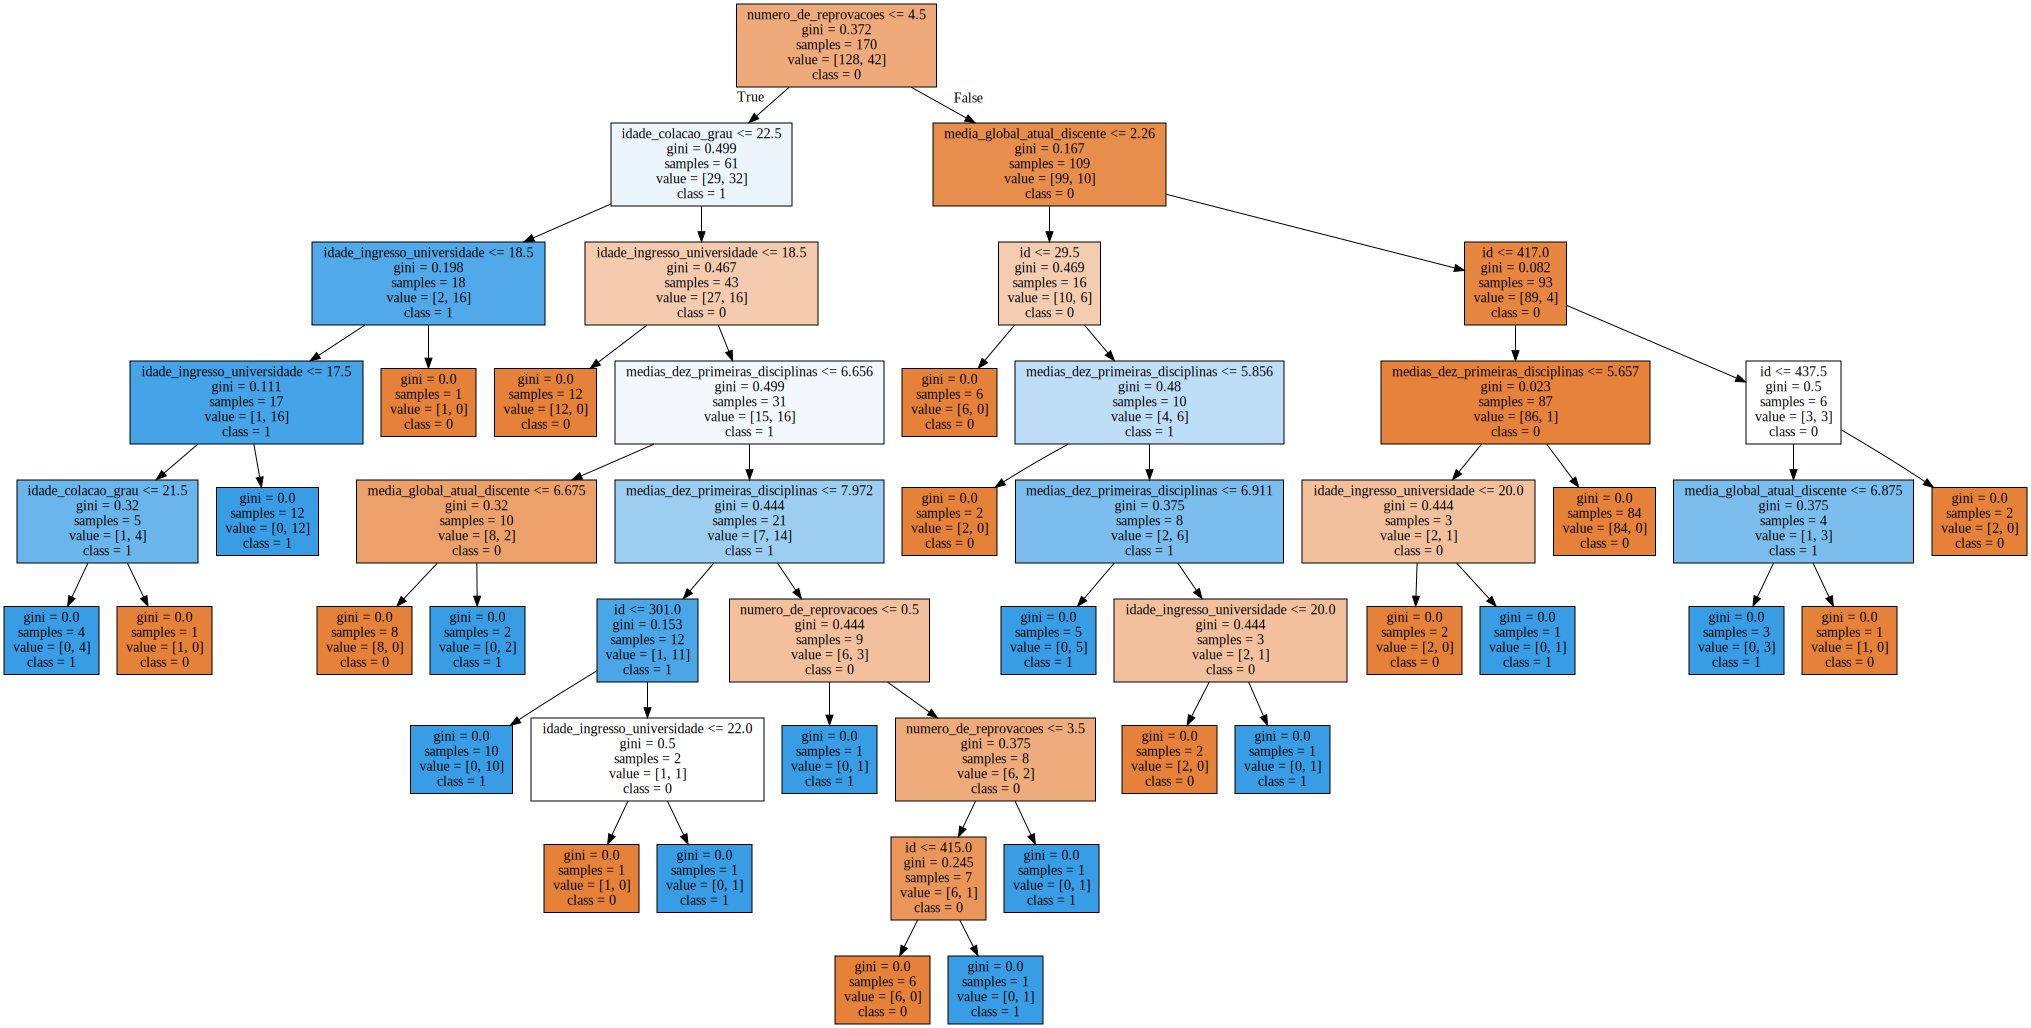

In [58]:
# load dataset
dataset = pd.read_csv('Dataset_Final.txt', sep='\t')
#data = load_wine()

# target vector
y = [1 if classe == 'SIM' else 0 for classe in dataset.target]

# feature matrix
X = data.drop(['target'], axis=1)

# class labels
#labels = data.feature_names
labels = ['id', 'idade_ingresso_universidade', 'idade_colacao_grau', 'media_global_atual_discente', 'media_global_atual_matriz_curricular', 'quantidade_trancamentos', 'numero_de_reprovacoes', 'medias_dez_primeiras_disciplinas']
# print dataset description
#print(data.DESCR)

estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))
#Image(filename = 'tree_limited.png')
#X.head()

In [0]:
dataset = pd.read_csv('dataset.tsv', sep='\t')

In [0]:
dataset.head()

,id,idade_ingresso_universidade,idade_colacao_grau,media_global_atual_discente,media_global_atual_matriz_curricular,quantidade_trancamentos,numero_de_reprovacoes,medias_dez_primeiras_disciplinas,target
0,1,19,26.0,5.01,4.97,1.0,16,6.062500,NÃO
1,2,19,23.0,0.00,4.97,0.0,2,7.944444,SIM
2,3,18,23.0,0.00,4.97,0.0,4,7.411111,NÃO
3,5,17,22.0,0.00,4.97,0.0,5,6.666667,NÃO
4,6,19,23.0,6.86,4.97,0.0,2,6.322222,SIM


In [0]:
from sklearn.feature_extraction import DictVectorizer

# Features relevantes
qualitative_features = ['idade_ingresso_universidade', 'idade_colacao_grau', 'media_global_atual_discente', 'media_global_atual_matriz_curricular', 'quantidade_trancamentos', 'numero_de_reprovacoes', 'medias_dez_primeiras_disciplinas']

# Trecho de código que foi utlizado para normalizar os dados
v = DictVectorizer()
data_normalize = v.fit_transform(dataset[qualitative_features].to_dict('records')).toarray()

In [0]:
data_normalize

array([[26.        , 19.        ,  5.01      , ...,  6.0625    ,
        16.        ,  1.        ],
       [23.        , 19.        ,  0.        , ...,  7.94444444,
         2.        ,  0.        ],
       [23.        , 18.        ,  0.        , ...,  7.41111111,
         4.        ,  0.        ],
       ...,
       [22.        , 18.        ,  7.52      , ...,  7.49      ,
         1.        ,  0.        ],
       [20.        , 19.        ,  7.86      , ...,  9.4       ,
         0.        ,  0.        ],
       [26.        , 25.        ,  5.6       , ...,  0.        ,
         1.        ,  0.        ]])

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_Final.txt to Dataset_Final.txt


## Código que gera a árvore de decisão

In [0]:
# Lendo o arquivo ID3.py

from google.colab import files
uploaded = files.upload()

Saving ID3.py to ID3.py


In [0]:
from ID3 import *

run_tree('Dataset_Final.txt')

Initiating dataset...
Headers: , idade_ingresso_universidade, idade_colacao_grau, media_global_atual_discente, media_global_atual_matriz_curricular, quantidade_trancamentos, numero_de_reprovacoes, medias_dez_primeiras_disciplinas
Target: target


Training set accuracy: 98.82 %


#Avaliação dos resultados
O grupo deve avaliar se o modelo (e os dados utilizados) é adequado para tratar o problema proposto.

Embora os dados contenham uma variedade de informações sobre os alunos, e o desbalanceamento dos dados após o pré-processamento, o modelo final gerado e a abordagem* proposta pelo grupo em conjunto com o algoritmo ID3, o resultado em **training set accuracy** foi de 98.82%.

*quando falamos em abordagem, no referimos a tudo que foi descrito na seção **DESCRIÇÃO DO MODELO**.